## CIFAR-100 Image Classification

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers

In [3]:
data = tf.keras.datasets.cifar100

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
test_images.shape

(10000, 32, 32, 3)

In [7]:
print(train_labels[0])

[19]


In [8]:
train_labels[0]

array([19])

In [9]:
train_images[1]

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [255, 255, 255]]

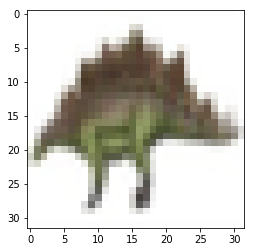

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.show()

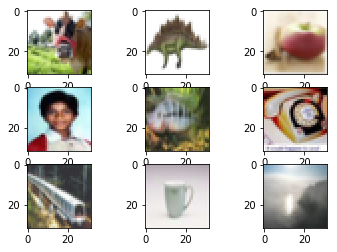

In [11]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
plt.show()

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
# 3 conv2d 2 maxpooling 256 adam
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       73984     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 107s 69ms/step - loss: 3.7768 - accuracy: 0.1243 - val_loss: 3.2441 - val_accuracy: 0.2147
Epoch 2/10
1563/1563 [==============================] - 112s 72ms/step - loss: 3.0198 - accuracy: 0.2543 - val_loss: 2.9064 - val_accuracy: 0.2734
Epoch 3/10
1563/1563 [==============================] - 108s 69ms/step - loss: 2.6630 - accuracy: 0.3265 - val_loss: 2.6191 - val_accuracy: 0.3375
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 2.4109 - accuracy: 0.3775 - val_loss: 2.5555 - val_accuracy: 0.3599
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 2.2283 - accuracy: 0.4135 - val_loss: 2.5135 - val_accuracy: 0.3713
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 2.0629 - accuracy: 0.4527 - val_loss: 2.4939 - val_accuracy: 0.3801
Epoch 7/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.9209 - accuracy: 0.4847 - val_loss: 2

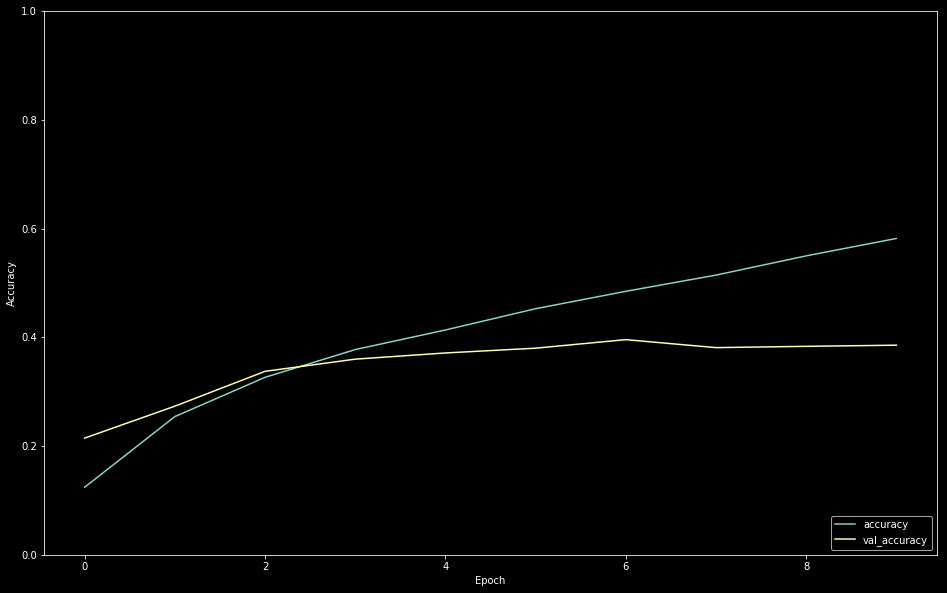

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=([16,10]))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [15]:
# 2 conv2d 1 max pooling 256
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       73984     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               11075840  
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
Total params: 11,176,420
Trainable params: 11,176,420
Non-trainable params: 0
__________________________________________

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 107s 69ms/step - loss: 3.5243 - accuracy: 0.1752 - val_loss: 3.0372 - val_accuracy: 0.2641
Epoch 2/10
1563/1563 [==============================] - 107s 69ms/step - loss: 2.7304 - accuracy: 0.3176 - val_loss: 2.7159 - val_accuracy: 0.3197
Epoch 3/10
1563/1563 [==============================] - 106s 68ms/step - loss: 2.3411 - accuracy: 0.3987 - val_loss: 2.6267 - val_accuracy: 0.3519
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.9826 - accuracy: 0.4757 - val_loss: 2.5890 - val_accuracy: 0.3618
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6125 - accuracy: 0.5644 - val_loss: 2.7185 - val_accuracy: 0.3605
Epoch 6/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.2376 - accuracy: 0.6563 - val_loss: 3.0420 - val_accuracy: 0.3445
Epoch 7/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.9189 - accuracy: 0.7378 - val_loss: 3

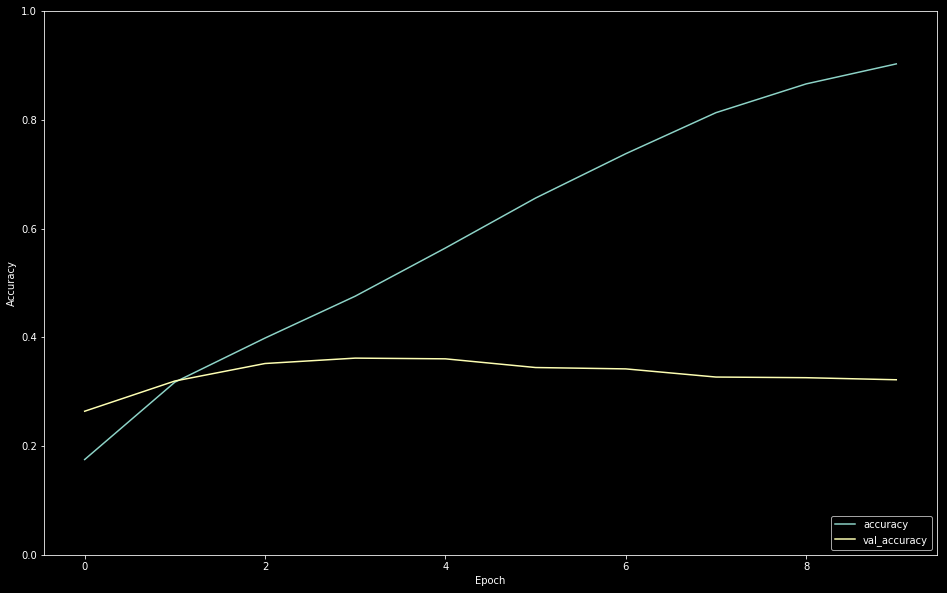

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=([16,10]))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [18]:
# 2 conv2d and 1 maxpooling2d 128
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12900     
Total params: 2,819,812
Trainable params: 2,819,812
Non-trainable params: 0
____________________________________________

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 3.6579 - accuracy: 0.1501 - val_loss: 3.1126 - val_accuracy: 0.2434
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 2.8928 - accuracy: 0.2868 - val_loss: 2.8298 - val_accuracy: 0.2989
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 2.5352 - accuracy: 0.3580 - val_loss: 2.6981 - val_accuracy: 0.3305
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.2681 - accuracy: 0.4152 - val_loss: 2.6811 - val_accuracy: 0.3399
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.0335 - accuracy: 0.4651 - val_loss: 2.6953 - val_accuracy: 0.3451
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.8083 - accuracy: 0.5159 - val_loss: 2.7382 - val_accuracy: 0.3556
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5717 - accuracy: 0.5703 - val_loss: 2.9106 -

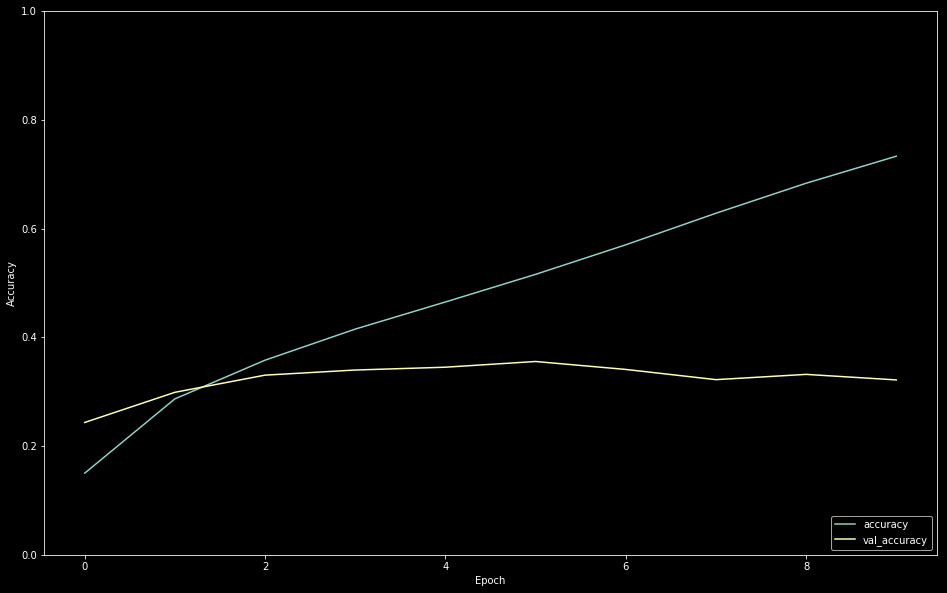

In [20]:
plt.style.use('dark_background')
plt.figure(figsize=([16,10]))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [19]:
# 3 conv2d 2 maxpooling 256 rmsprop
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 256)       73984     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [20]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 118s 75ms/step - loss: 3.6785 - accuracy: 0.1435 - val_loss: 3.3553 - val_accuracy: 0.2040
Epoch 2/10
1563/1563 [==============================] - 114s 73ms/step - loss: 2.8390 - accuracy: 0.2994 - val_loss: 2.9508 - val_accuracy: 0.2812
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 2.4253 - accuracy: 0.3826 - val_loss: 2.6713 - val_accuracy: 0.3412
Epoch 4/10
1563/1563 [==============================] - 113s 73ms/step - loss: 2.1238 - accuracy: 0.4457 - val_loss: 2.5648 - val_accuracy: 0.3942
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8752 - accuracy: 0.5014 - val_loss: 2.7001 - val_accuracy: 0.3727
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.6443 - accuracy: 0.5553 - val_loss: 2.4780 - val_accuracy: 0.3985
Epoch 7/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4403 - accuracy: 0.6076 - val_loss: 2

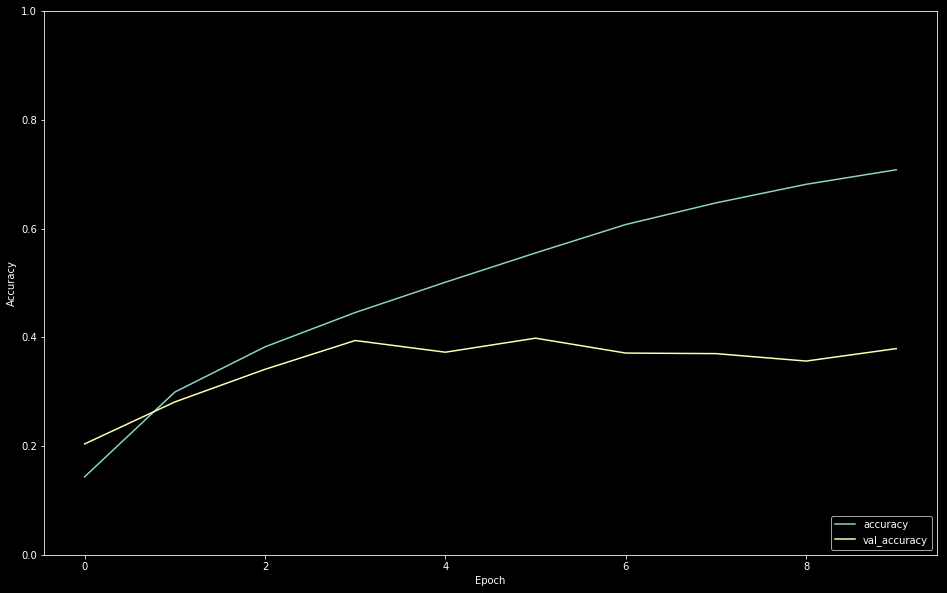

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=([16,10]))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [13]:
# 3 conv2d 2 maxpooling 128 adam
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               5

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 3.8193 - accuracy: 0.1143 - val_loss: 3.3337 - val_accuracy: 0.1908
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 3.0777 - accuracy: 0.2455 - val_loss: 2.9342 - val_accuracy: 0.2751
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.7221 - accuracy: 0.3135 - val_loss: 2.7021 - val_accuracy: 0.3287
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 2.4873 - accuracy: 0.3610 - val_loss: 2.5890 - val_accuracy: 0.3474
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 2.3093 - accuracy: 0.4002 - val_loss: 2.5120 - val_accuracy: 0.3663
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.1636 - accuracy: 0.4309 - val_loss: 2.4596 - val_accuracy: 0.3794
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.0319 - accuracy: 0.4613 - val_loss: 2.5110 -

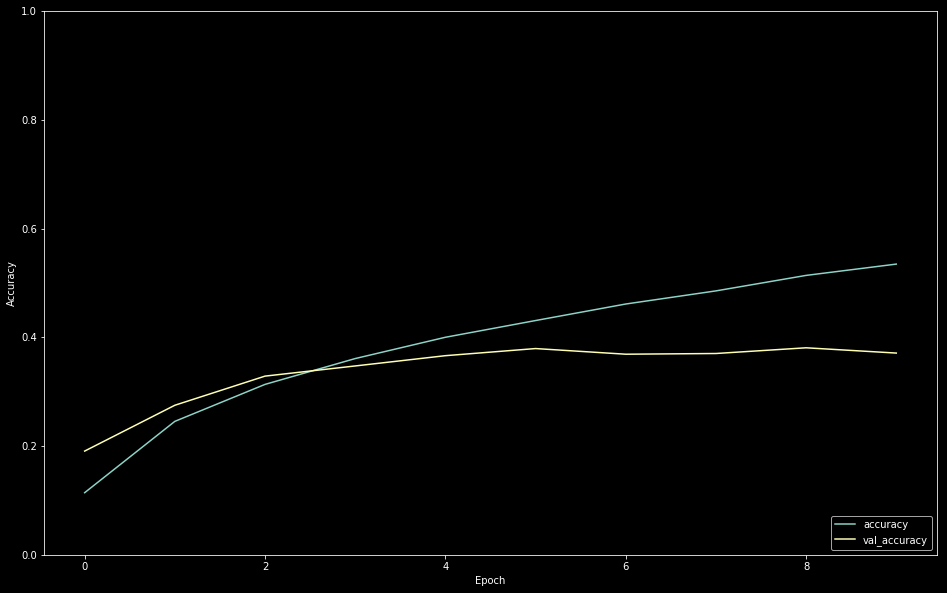

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=([16,10]))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [16]:
# 3 conv2d 2 maxpooling 256 adam
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       73984     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 108s 69ms/step - loss: 3.7649 - accuracy: 0.1260 - val_loss: 3.1670 - val_accuracy: 0.2313
Epoch 2/10
1563/1563 [==============================] - 112s 72ms/step - loss: 2.9597 - accuracy: 0.2684 - val_loss: 2.8016 - val_accuracy: 0.2990
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 2.5667 - accuracy: 0.3454 - val_loss: 2.6180 - val_accuracy: 0.3353
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 2.3082 - accuracy: 0.3998 - val_loss: 2.4510 - val_accuracy: 0.3744
Epoch 5/10
1563/1563 [==============================] - 112s 71ms/step - loss: 2.0957 - accuracy: 0.4479 - val_loss: 2.4775 - val_accuracy: 0.3787
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8959 - accuracy: 0.4881 - val_loss: 2.4536 - val_accuracy: 0.3849
Epoch 7/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.7161 - accuracy: 0.5328 - val_loss: 2

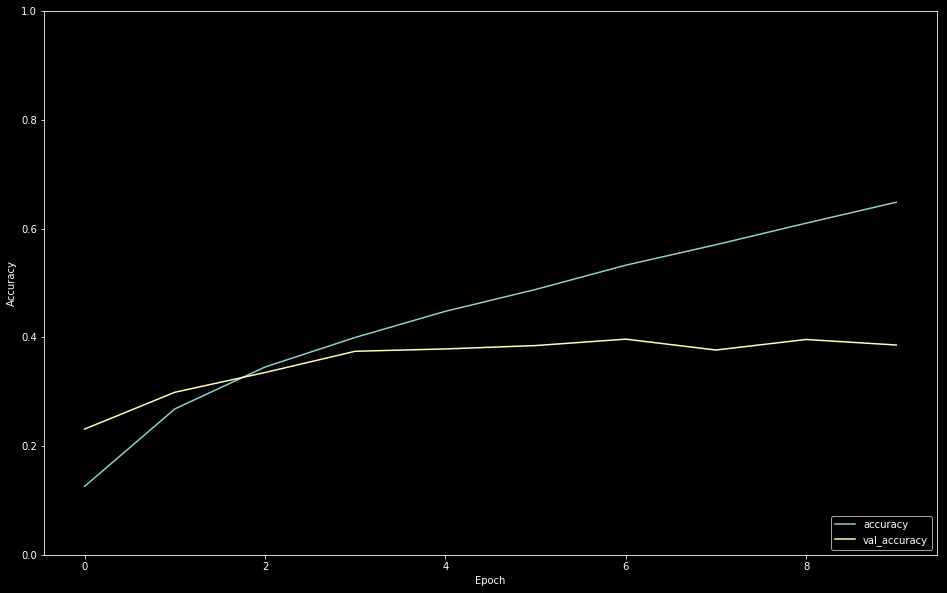

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=([16,10]))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')